# 作業一：中文詞意自動標記應用

In [1]:
import pandas as pd
import re

## 第一題

以 SenseTagger 處理本週語料（教科書課文.csv）之後，請從 `的、還、就、又、也` 之中選擇一個詞，統計出這個詞的 所有sense 在1～6年級課文的數量分佈，

*   (a). 先以 **DataFrame** 列出結果（30%）
    - 參見下方範例 df
    - 若是該詞擁有 8 個 Sense Type 則會有 8 個 rows
*   (b). 再畫一張**折線圖**（30%）
    
    - x軸為年級，y軸為數量，折線顏色為該詞的不同Sense Type，請列出圖例 (legend)
    - 若是該詞擁有 8 個 Sense Type 則會有 8 條線
    - 參見下方範例折線圖



### 第一題範例

In [ ]:
# 範例 DataFrame
##「而」的3個SenseType在不同年級的數量分佈
df

,SenseType,一,二,三,四,五,六,Total
0,表言談中用來表主題的轉折。,4,13,11,4,6,7,45
1,表後述事件緊接著前述事件發生。,10,10,2,3,4,16,45
2,連接前述原因和後述結果的詞組，用以表示因果關係。,2,3,18,7,12,2,44


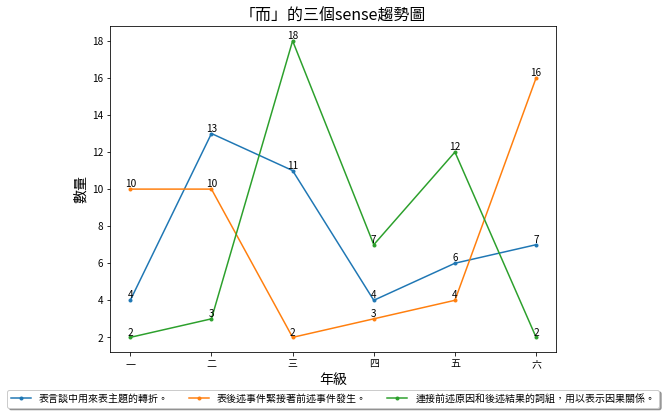

In [ ]:
# 範例折線圖
plt.show()

### CWN sense tagger

In [ ]:
!pip install -U gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
!git clone https://github.com/seantyh/dwsd-beta

Cloning into 'dwsd-beta'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 34 (delta 5), reused 33 (delta 4), pack-reused 0
Receiving objects: 100% (34/34), 18.14 KiB | 9.07 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
!pip install -q CwnGraph transformers

In [ ]:
import sys
if "dwsd-beta" not in sys.path:
  sys.path.append("dwsd-beta")

In [ ]:
from dotted_wsd import DottedWsdTagger

updating manifest...
manifest version:  v2022.08


In [ ]:
tagger = DottedWsdTagger()

downloading image: 1znQexFItQsALVz6hZmBfR5uvcNdhclOZ...


Downloading...
From: https://drive.google.com/uc?id=1znQexFItQsALVz6hZmBfR5uvcNdhclOZ
To: /content/cwn-graph-v.2022.08.01.pyobj
100%|██████████| 31.6M/31.6M [00:00<00:00, 129MB/s]


image has downloaded:  cwn-graph-v.2022.08.01.pyobj


Downloading...
From (original): https://drive.google.com/uc?id=14Ea1KtIC7zBQ9lFh-vwbKLuiftpabIoo
From (redirected): https://drive.google.com/uc?id=14Ea1KtIC7zBQ9lFh-vwbKLuiftpabIoo&confirm=t&uuid=4be4069d-369f-41a8-a02c-393131fe11c9
To: /content/dotted-wsd.zip
100%|██████████| 380M/380M [00:03<00:00, 107MB/s] 
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

### DistilTag

In [ ]:
!pip install -U DistilTag

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 3.8 MB/s eta 0:00:00


In [ ]:
import DistilTag
DistilTag.download()

Downloading...
From (original): https://drive.google.com/uc?id=1AzUICPQ5MMt_IWg4JZ3mWM6vGbQkv01L
From (redirected): https://drive.google.com/uc?id=1AzUICPQ5MMt_IWg4JZ3mWM6vGbQkv01L&confirm=t&uuid=46790fd8-fa3c-405d-8b64-d522e0be14d1
To: /tmp/tmpg1rfm2d6distiltag/tagmodel.zip
100%|██████████| 501M/501M [00:04<00:00, 117MB/s]


setting up model...
DistilTag model installed.


In [ ]:
from DistilTag import DistilTag
distilTagger = DistilTag()

### Preprocessing

In [ ]:
# load data
data=pd.read_csv("教科書課文.csv")
textbook=pd.DataFrame(data)
textbook.head()

,No.,Subject,Grade,Year,Publisher,Type,Lesson,Tittle,Content
0,D001,國語,6下,91,國立編譯館,text,1,生活處處美,"生活處處美\n\n餐桌上的美人\n晚餐時媽媽做了她的拿手好菜—糖醋里肌,材料除了裹粉油炸成金..."
1,D002,國語,6下,91,國立編譯館,text,2,梅樹飄香,"五十多年前的一天,天上飄著細雨,李梅樹走出三峽民生街李家老宅,穿過街旁的小巷,走向祖師廟。這..."
2,D003,國語,6下,91,國立編譯館,text,3,胸有丘壑張大千,"胸有丘壑張大千\n\n一襲長袍,一把長長的鬍鬚,張大千在護士小姐扶持下,顫巍巍的來到那幅巨大..."
3,D004,國語,6下,91,國立編譯館,text,4,天涯若比鄰,"你有沒有想過:當你正興高采烈的和同學玩耍時,在地球遙遠的另一端,那兒的小朋友還沉睡在夢鄉中呢..."
4,D005,國語,6下,91,國立編譯館,text,5,小故事的啟示,"小故事的啟示\n讓路給小鴨子!這是真的嗎?美國鄉村公路上車輛不多,公路兩邊林木茂盛,常會看見..."


In [ ]:
textbook.drop(["Subject", "Year", "Publisher", "Type", "Lesson", "Tittle"], axis=1, inplace=True)
textbook.replace({"1上":"一", "1下":"一", "2上":"二", "2下":"二", "3上":"三", "3下":"三", "4上":"四", "4下":"四", "5上":"五", "5下":"五", "6上":"六", "6下":"六"}, inplace=True)
textbook.head()

,No.,Grade,Content
0,D001,六,"生活處處美\n\n餐桌上的美人\n晚餐時媽媽做了她的拿手好菜—糖醋里肌,材料除了裹粉油炸成金..."
1,D002,六,"五十多年前的一天,天上飄著細雨,李梅樹走出三峽民生街李家老宅,穿過街旁的小巷,走向祖師廟。這..."
2,D003,六,"胸有丘壑張大千\n\n一襲長袍,一把長長的鬍鬚,張大千在護士小姐扶持下,顫巍巍的來到那幅巨大..."
3,D004,六,"你有沒有想過:當你正興高采烈的和同學玩耍時,在地球遙遠的另一端,那兒的小朋友還沉睡在夢鄉中呢..."
4,D005,六,"小故事的啟示\n讓路給小鴨子!這是真的嗎?美國鄉村公路上車輛不多,公路兩邊林木茂盛,常會看見..."


In [ ]:
def get_dotted_wsd(grade, text):

  id_pattern = '\[(.*?)\]'
  con_pattern = '\((.*?)\)'
  gloss_pattern = '(\[|\()\S+(\]|\))|\s'

  lemma, pos, senseID, confidence, gloss = [], [], [], [], []
  for t in text:
    tt = tagger.sense_tag_per_sentence(t)
    for i in tt:
      lemma.append(i[0])
      pos.append(i[1])
      if len(i[2]) > 0:
        id_search = re.search(id_pattern, i[2])
        con_search = re.search(con_pattern, i[2])
        senseID.append(id_search[0][1:-1])
        confidence.append(con_search[0][1:-1])
        gloss.append(re.sub(gloss_pattern, '', i[2]))
      else:
        gloss.append('')
        senseID.append('')
        confidence.append('')

  df = pd.DataFrame({
      'Grade':grade,
      'Lemma':lemma,
      'Part-of-Speech':pos,
      'Sense_id':senseID,
      'Gloss': gloss,
      'Confidence': confidence
   })

  return df

In [ ]:
# 範例
# tagged = distilTagger.tag('我還很喜歡聽柴可夫斯基，可是打柴可夫斯基他會痛')
# df = get_dotted_wsd('6', tagged)
tagged = distilTagger.tag(textbook.iloc[0]["Content"])
df = get_dotted_wsd(textbook.iloc[0]["Grade"], tagged)
df

,Grade,Lemma,Part-of-Speech,Sense_id,Gloss,Confidence
0,六,生活,Na,06743601,日常活動的情況。,1.0000
1,六,處處,D,,,
2,六,美餐桌,Na,,,
3,六,上,Ncd,04081301,前述物體的表面。,0.6659
4,六,的,DE,07023401,表一般的修飾關係，用於修飾語和中心語間。,0.9848
...,...,...,...,...,...,...
550,六,我,Nh,05238701,代指說話者。,0.9108
551,六,的,DE,07023402,表領屬關係，用於修飾語和中心語間。,0.5381
552,六,臉,Na,06663901,動物頭從額頭到下巴的部分。,0.5586
553,六,了,T,04005202,表變化或出現新的情況的語氣。,0.6555


In [ ]:
start_index=90

result = pd.DataFrame(columns=['Grade', 'Gloss'])
for index, row in textbook.iloc[start_index:].iterrows():
  tagged = distilTagger.tag(row["Content"])
  extract = get_dotted_wsd(row["Grade"], tagged)
  result = pd.concat([result, extract])
  print(row["No."])

D091
D092
D093
D094
D095
D096
D097
D098
D099
D100
D101
D102
D103
D104
D105
D106
D107
D108
D109
D110
D111
D112
D113
D114


In [ ]:
result.to_csv("result.csv", mode='a')

### (a) 先以 **DataFrame** 列出結果（30%）
- 參見範例 df
- 若是該詞擁有 8 個 Sense Type 則會有 8 個 rows

In [2]:
# load data
ST=pd.read_csv("result.csv")
ST.shape

(51756, 7)

In [ ]:
hai=ST[ST["Lemma"]=='還'].copy()
hai.shape

(127, 7)

In [ ]:
hai.drop(["Unnamed: 0", "Part-of-Speech", "Sense_id", "Confidence"], axis=1, inplace=True)
hai.head()

,Grade,Gloss,Lemma
29,六,表前述範圍之外有所補充。,還
237,六,表事情尚未完成。,還
1771,六,表動作或情況持續不變。,還
2153,六,表前述範圍之外有所補充。,還
2635,六,表前述範圍之外有所補充。,還


In [ ]:
# 「還」的3個SenseType在不同年級的數量分佈
pivot_df = hai.pivot_table(index='Gloss', columns='Grade', aggfunc='size', fill_value=0)
pivot_df = pivot_df.reindex(columns=['一', '二', '三', '四', '五', '六'], fill_value=0)

pivot_df['Total'] = pivot_df.sum(axis=1)

pivot_df.reset_index(inplace=True)
pivot_df.rename(columns={'Gloss': 'SenseType'}, inplace=True)
pivot_df.rename_axis(None, axis=1, inplace=True)

pivot_df

,SenseType,一,二,三,四,五,六,Total
0,交回、歸還。,0,0,0,1,1,0,2
1,恢復、回復原來的狀態。,0,0,0,0,1,1,2
2,表事情尚未完成。,0,0,6,3,4,2,15
3,表前述對象符合讓步後的條件。,0,0,0,3,2,2,7
4,表前述範圍之外有所補充。,0,0,9,20,18,24,71
5,表動作或情況持續不變。,0,0,1,9,4,7,21
6,表程度高於比較對象。,0,0,0,0,0,1,1
7,表超出預料。,0,0,0,3,0,2,5
8,返回、回來原來的地方。,0,0,0,0,1,2,3


### (b). 再畫一張**折線圖**（30%）
    
- x軸為年級，y軸為數量，折線顏色為該詞的不同Sense Type，請列出圖例 (legend)
- 若是該詞擁有 8 個 Sense Type 則會有 8 條線
- 參見範例折線圖

In [65]:
# Colab 進行matplotlib繪圖時顯示繁體中文
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-03-18 13:56:47--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.152.138, 142.250.152.139, 142.250.152.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.152.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-03-18 13:56:47--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.234.132, 2607:f8b0:4001:c17::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.234.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2024-03-18 13

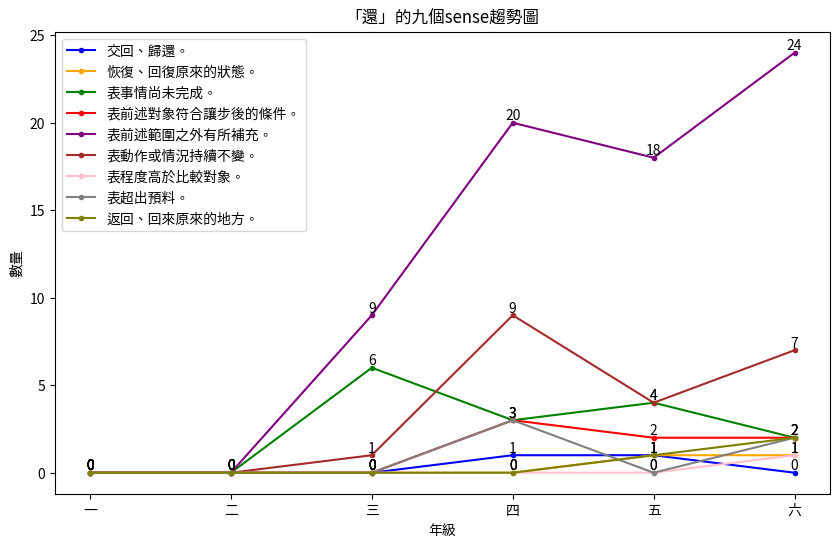

In [ ]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive']

plt.figure(figsize=(10, 6))
for i, sense_type in enumerate(pivot_df['SenseType']):
    plt.plot(pivot_df.columns[1:-1], pivot_df.iloc[i, 1:-1], marker='.', label=sense_type, color=colors[i])
    for x, y in zip(pivot_df.columns[1:-1], pivot_df.iloc[i, 1:-1]):
        plt.text(x, y, str(y), ha='center', va='bottom')

plt.legend()

plt.title('「還」的九個sense趨勢圖')
plt.xlabel('年級')
plt.ylabel('數量')

plt.show()

## 第二題


請利用你回答第一題的過程，**寫出一個function** （40%）

此function需要能讓我們直接查詢某個詞 ( `input為string` )，就獲得該詞的趨勢折線圖（ `output為和第一題範例類似的折線圖` ）

In [ ]:
def num_to_chinese(num):
    chinese_nums = ['零', '一', '二', '三', '四', '五', '六', '七', '八', '九']
    num_str = str(num)
    chinese_str = ''
    for digit in num_str:
        chinese_str += chinese_nums[int(digit)]
    return chinese_str

In [ ]:
def word_plot(word):
  # 從csv中擷取該詞的資料
  df=ST[ST["Lemma"]==word].copy()
  df.drop(["Unnamed: 0", "Part-of-Speech", "Sense_id", "Confidence"], axis=1, inplace=True)

  # 得出特定表格
  pivot_df = df.pivot_table(index='Gloss', columns='Grade', aggfunc='size', fill_value=0)
  pivot_df = pivot_df.reindex(columns=['一', '二', '三', '四', '五', '六'], fill_value=0)

  pivot_df['Total'] = pivot_df.sum(axis=1)

  pivot_df.reset_index(inplace=True)
  pivot_df.rename(columns={'Gloss': 'SenseType'}, inplace=True)
  pivot_df.rename_axis(None, axis=1, inplace=True)

  # 畫趨勢圖
  cmap = plt.get_cmap('tab10')
  colors = [cmap(i) for i in range(pivot_df.shape[0])]
  plt.figure(figsize=(10, 6))
  for i, sense_type in enumerate(pivot_df['SenseType']):
      plt.plot(pivot_df.columns[1:-1], pivot_df.iloc[i, 1:-1], marker='.', label=sense_type, color=colors[i])
      for x, y in zip(pivot_df.columns[1:-1], pivot_df.iloc[i, 1:-1]):
          plt.text(x, y, str(y), ha='center', va='bottom')

  plt.legend()

  plt.title('「'+word+'」的'+num_to_chinese(pivot_df.shape[0])+'個sense趨勢圖')
  plt.xlabel('年級')
  plt.ylabel('數量')

  plt.show()

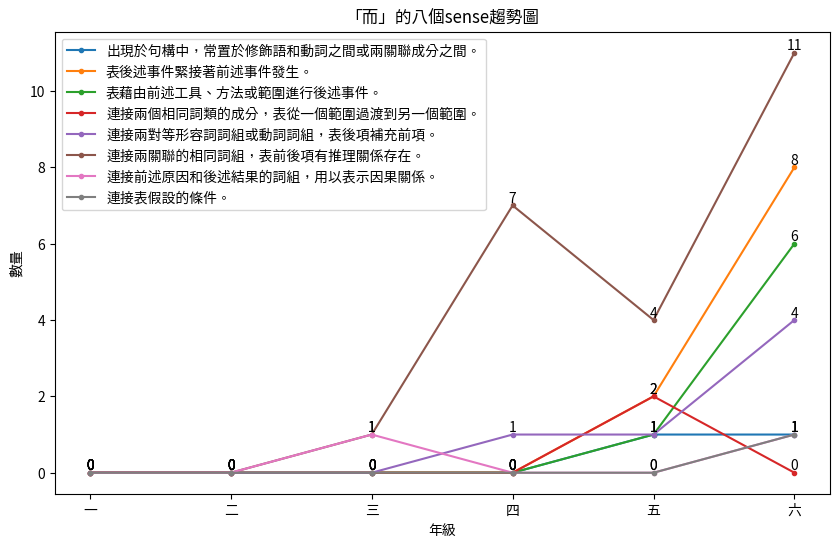

In [ ]:
word_plot('而')

## 加分題

SenseTagger 處理詞時，會提供該詞的 POS（詞性），請統計出所有名詞、動詞、功能詞在6個年級的sense type 數量，並**畫出一張折線圖**。


*   此折線圖會有 3 條線，分別是名詞、動詞、功能詞。
*   一條折線的折點為同年級、同詞性的所有 Sense Type 數量相加。
* **加分方式**：畫出完整圖 +10 分，缺1個要素（標題、x軸 label、y軸 label、圖例、每一點數值）則少加1分



In [83]:
ST.head(1)

,Unnamed: 0,Grade,Gloss,Lemma,Part-of-Speech,Sense_id,Confidence
0,0.0,六,日常活動的情況。,生活,Na,06743601,1.0000


In [84]:
pos=ST.drop(["Unnamed: 0", "Gloss", "Sense_id", "Confidence"], axis=1)

# 得出特定表格
pivot_df = pos.pivot_table(index='Part-of-Speech', columns='Grade', aggfunc='size', fill_value=0)
pivot_df = pivot_df.reindex(columns=['一', '二', '三', '四', '五', '六'], fill_value=0)

pivot_df['Total'] = pivot_df.sum(axis=1)

pivot_df.reset_index(inplace=True)
pivot_df.rename(columns={'Gloss': 'SenseType'}, inplace=True)
pivot_df.rename_axis(None, axis=1, inplace=True)

參考[台灣兒童語言語料庫(TCCM)詞類規範](https://lope.linguistics.ntu.edu.tw/tccm/docs/Criterion_of_POS_CLLB_20110318.pdf)以及[中研院平衡語料庫](https://asbc.iis.sinica.edu.tw/images/98-04.pdf)

In [85]:
# 去除標點符號
df1 = pivot_df[(pivot_df["Part-of-Speech"] != 'COLONCATEGORY') &
                    (pivot_df["Part-of-Speech"] != 'COMMACATEGORY') &
                    (pivot_df["Part-of-Speech"] != 'DASHCATEGORY') &
                    (pivot_df["Part-of-Speech"] != 'EXCLANATIONCATEGORY') &
                    (pivot_df["Part-of-Speech"] != 'PARENTHESISCATEGORY') &
                    (pivot_df["Part-of-Speech"] != 'PAUSECATEGORY') &
                    (pivot_df["Part-of-Speech"] != 'PERIODCATEGORY') &
                    (pivot_df["Part-of-Speech"] != 'Part-of-Speech') &
                    (pivot_df["Part-of-Speech"] != 'QUESTIONCATEGORY') &
                    (pivot_df["Part-of-Speech"] != 'SEMICOLONCATEGORY') &
                    (pivot_df["Part-of-Speech"] != 'SPCHANGECATEGORY')]
df1.reset_index(drop=True, inplace=True)

In [86]:
# 名詞：整合 Na(14) Ncd(17) Ng(25) Nb(15) Nc(16) Nh(26) Nd(18)
sum_row = df1.iloc[[14, 15, 16, 17, 18, 25, 26]].sum(axis=0)
df2 = df1.append(sum_row, ignore_index=True)
df2['Part-of-Speech'].iloc[-1]="名詞"
df2 = df2.drop(df2.index[[14, 15, 16, 17, 18, 25, 26]])
df2.reset_index(drop=True, inplace=True)

<ipython-input-86-8977d13dcb52>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df1.append(sum_row, ignore_index=True)
<ipython-input-86-8977d13dcb52>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Part-of-Speech'].iloc[-1]="名詞"


In [87]:
# 動詞：整合 VH(33) VHC(34) SHI(22) VA(24) VB(26) VI(35) VC(27) VAC(25) VCL(28) VG(32) VJ(36) VK(37) VL(38) V_2(39) VD(29) VE(30) VF(31)
sum_row2 = df2.iloc[[33, 34, 22, 24, 26, 35, 27, 25, 28, 32, 36, 37, 38, 39, 29, 30, 31]].sum(axis=0)
df3 = df2.append(sum_row2, ignore_index=True)
df3['Part-of-Speech'].iloc[-1]="動詞"
df3 = df3.drop(df3.index[[33, 34, 22, 24, 26, 35, 27, 25, 28, 32, 36, 37, 38, 39, 29, 30, 31]])
df3.reset_index(drop=True, inplace=True)

<ipython-input-87-d363fb250c9f>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df2.append(sum_row2, ignore_index=True)
<ipython-input-87-d363fb250c9f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Part-of-Speech'].iloc[-1]="動詞"


In [88]:
# 功能詞整合
sum_row3 = df3.iloc[0:23].sum(axis=0)
df4 = df3.append(sum_row3, ignore_index=True)
df4['Part-of-Speech'].iloc[-1]="功能詞"
df4 = df4.drop(df4.index[0:23])
df4.reset_index(drop=True, inplace=True)

<ipython-input-88-c2923134e5b5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df4 = df3.append(sum_row3, ignore_index=True)
<ipython-input-88-c2923134e5b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Part-of-Speech'].iloc[-1]="功能詞"


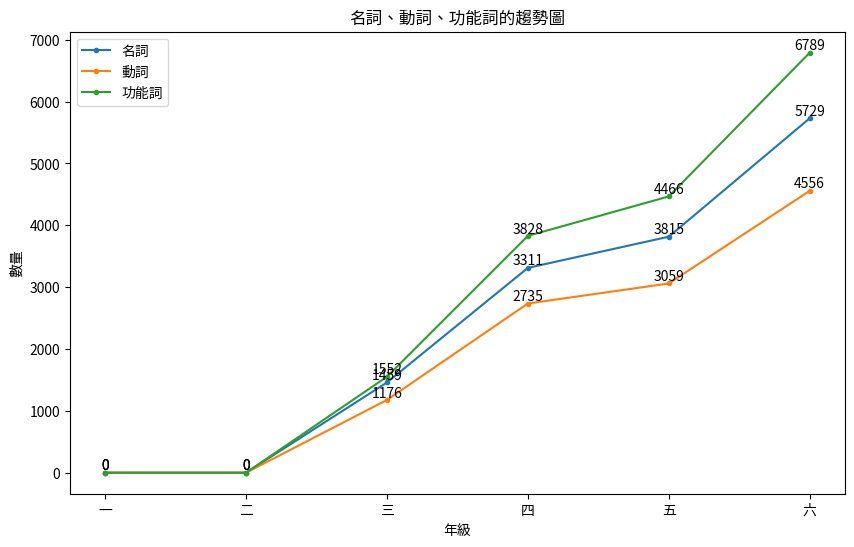

In [89]:
# 作圖
cmap = plt.get_cmap('tab10')
colors = [cmap(i) for i in range(df4.shape[0])]
plt.figure(figsize=(10, 6))
for i, sense_type in enumerate(df4['Part-of-Speech']):
    plt.plot(df4.columns[1:-1], df4.iloc[i, 1:-1], marker='.', label=sense_type, color=colors[i])
    for x, y in zip(df4.columns[1:-1], df4.iloc[i, 1:-1]):
        plt.text(x, y, str(y), ha='center', va='bottom')

plt.legend()

plt.title('名詞、動詞、功能詞的趨勢圖')
plt.xlabel('年級')
plt.ylabel('數量')

plt.show()